## 0. Pytorch libraries for computer vision

* `torchvision` - https://pytorch.org/vision/stable/index.html
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained cimputer vision model that you can leverange for your projects
* `torchvision.transform` - functions for manipulating your vision data (images) to be suitable for your model
* `torchvision.utils.data.Dataset` - Base dataset class for Pytorch
* `torchvision.utils.data.DataLoader` - Create a Python iterable over the dataset


In [1]:
#import libraries
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

##check version
print(torch.__version__)
print(torchvision.__version__)

d:\work\personal-projects\pytorch-nlp\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.13.1+cu117
0.14.1+cu117


## 1. Getting the dataset

The dataset is using is FashionMNIST from torchvision dataset

In [2]:
#settup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", #where to download data to
    train=True, #do we want the training dataset ?
    download = False, #do we want to download the dataset ?
    transform = torchvision.transforms.ToTensor(), #how do we want to transform the data ?
    target_transform = None #how do we want to transform the label/target ?    
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = False,
    transform = ToTensor(),
    target_transform = None
)

In [3]:
print(len(train_data), len(test_data))

60000 10000


In [4]:
##see the first training sample
print(type(train_data))
sample_image, sample_label = train_data[0]
print(sample_image, sample_label)

<class 'torchvision.datasets.mnist.FashionMNIST'>
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
       

In [5]:
class_names = train_data.classes
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
print(train_data.targets)

tensor([9, 0, 0,  ..., 3, 0, 5])


In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### 1.1 Check input and output shape of the data

In [8]:
##checking the shape of training sample
print(f"Image shape: {sample_image.shape} -> [color_channels, height, width]")
print(f"Image label: {sample_label}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: 9


### 1.2 Visualizing data

Image shape: ftorch.Size([1, 28, 28])


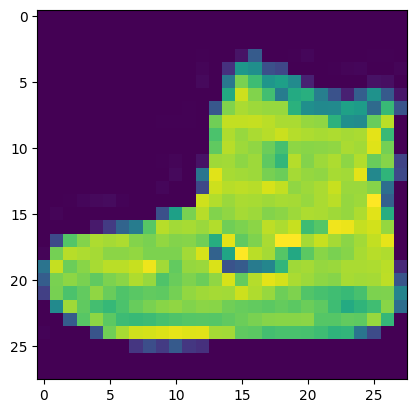

In [9]:
sample_image, sample_label = train_data[0]
print(f"Image shape: f{sample_image.shape}")
##show image
plt.imshow(sample_image.squeeze()) # squeeze to remove the shape error

(-0.5, 27.5, 27.5, -0.5)

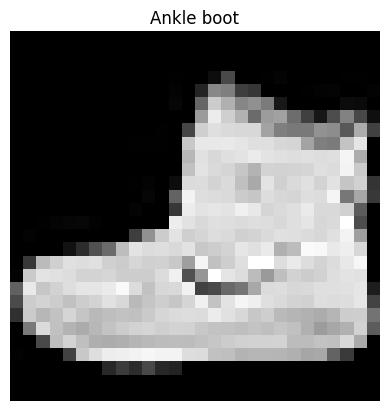

In [10]:
plt.imshow(sample_image.squeeze(), cmap ='gray')
plt.title(class_names[sample_label])
plt.axis(False)

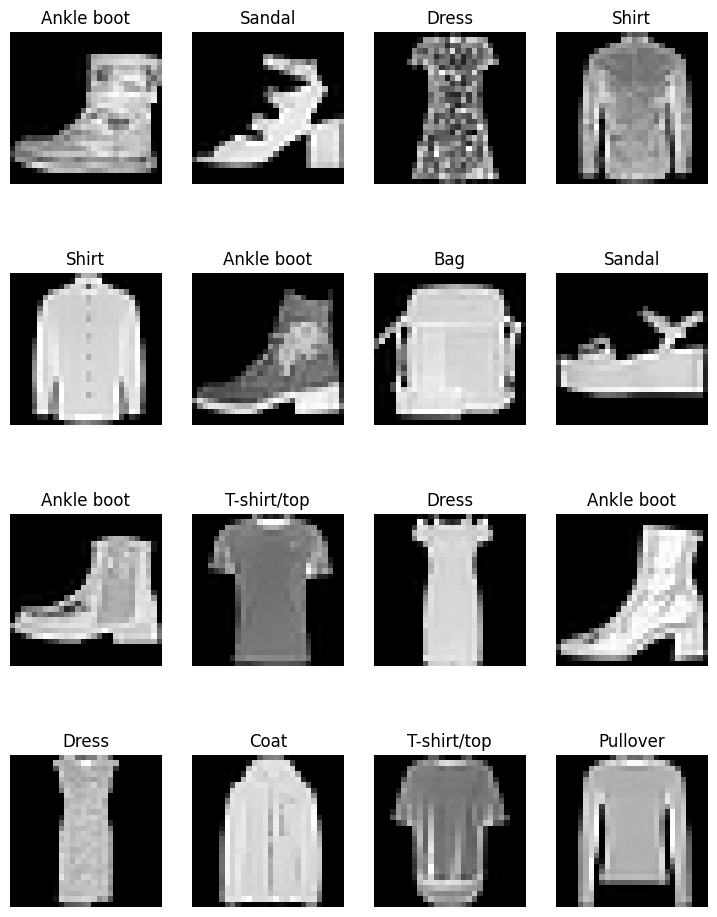

In [11]:
## Plot more image
#torch.manual_seed(42)
fig = plt.figure(figsize = (9,12))
rows, cols = 4,4
for i in range(1,  rows*cols +1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    fig.add_subplot(rows, cols, i)
    tmp_img, tmp_label = train_data[random_idx]
    plt.imshow(tmp_img.squeeze(), cmap ='gray')    
    plt.title(class_names[tmp_label])
    plt.axis(False)

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2.Prepare dataloader

Right now, our dataset is in the form of Pytorch Datasets.

DataLoader turns ourd dataset into Python iterable.

More specificcally, we want to turn our data into batches (mini-batches).

Why would we do this ?
1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60k images in one hit. So we break it down to 32 images at a time (batchsize is 32)
2. It give our Neural Network more chances to update its gradients per epoch.

In [13]:
from torch.utils.data import DataLoader

#setup the hyper parameters
BATCH_SIZE =32

#turn dataset into iterables (batches)
train_dataloader = DataLoader(train_data, 
                             batch_size = BATCH_SIZE,
                             shuffle = True)

test_dataloader = DataLoader(test_data,
                            batch_size = BATCH_SIZE,
                            shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x13d22d6e9d0>,
 <torch.utils.data.dataloader.DataLoader at 0x13d22d6e9a0>)

In [14]:
#  Let's checkout what we've created
print("Data loader: ",train_dataloader, test_dataloader)
print(f"Number of training {len(train_dataloader)} batches with batch size f{BATCH_SIZE}")
print(f"Number of test {len(test_dataloader)} batches with batch size f{BATCH_SIZE}")

Data loader:  <torch.utils.data.dataloader.DataLoader object at 0x0000013D22D6E9D0> <torch.utils.data.dataloader.DataLoader object at 0x0000013D22D6E9A0>
Number of training 1875 batches with batch size f32
Number of test 313 batches with batch size f32


In [15]:
### checking inside of a batch
train_image_batch, train_label_batch = next(iter(train_dataloader))
print(f"Shape of one batch of image: {train_image_batch.shape}")
print(f"Shape of one batch of label: {train_label_batch.shape}")

Shape of one batch of image: torch.Size([32, 1, 28, 28])
Shape of one batch of label: torch.Size([32])


Shape of image: torch.Size([1, 28, 28])
Shape of image: torch.Size([1, 28, 28])
Shape of image: torch.Size([1, 28, 28])
Shape of image: torch.Size([1, 28, 28])
Shape of image: torch.Size([1, 28, 28])
Shape of image: torch.Size([1, 28, 28])
Shape of image: torch.Size([1, 28, 28])
Shape of image: torch.Size([1, 28, 28])
Shape of image: torch.Size([1, 28, 28])
Shape of image: torch.Size([1, 28, 28])
Shape of image: torch.Size([1, 28, 28])
Shape of image: torch.Size([1, 28, 28])
Shape of image: torch.Size([1, 28, 28])
Shape of image: torch.Size([1, 28, 28])
Shape of image: torch.Size([1, 28, 28])
Shape of image: torch.Size([1, 28, 28])


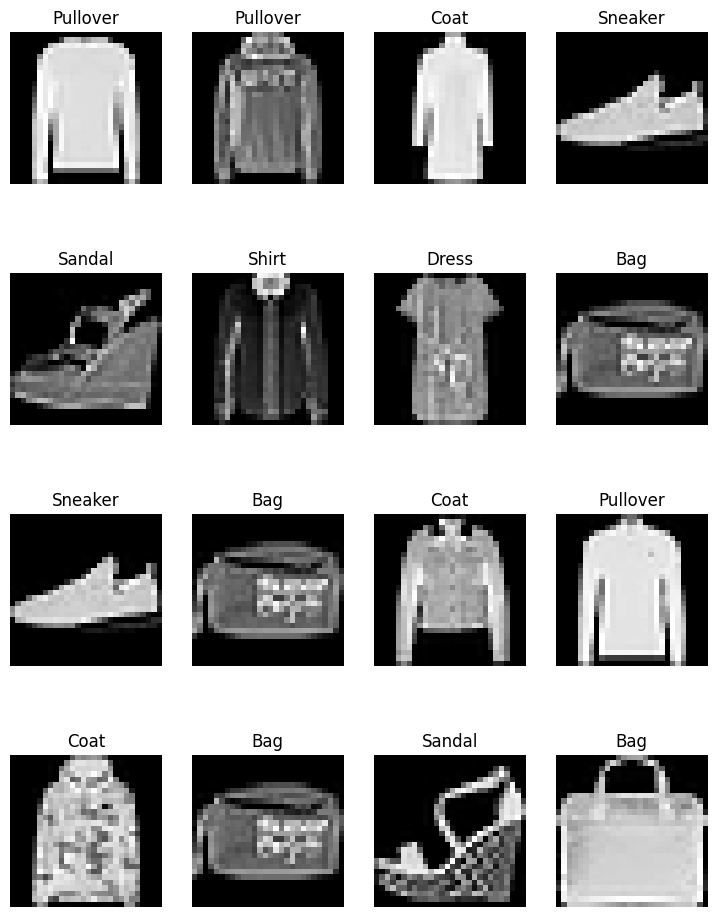

In [16]:
### show a sample
#torch.manual_seed(42)
rows, cols = 4,4
fig = plt.figure(figsize = (9,12))
for i in range(1,rows*cols +1):
    random_idx = torch.randint(1, len(train_image_batch), size =[1]).item()
    sample_image = train_image_batch[random_idx]
    sample_label = train_label_batch[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(sample_image.squeeze(), cmap='gray')
    plt.title(class_names[sample_label])
    plt.axis(False)
    print(f"Shape of image: {sample_image.shape}")

## 3.Build a baseline model
Whens srating to build a series of machine learning modeling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you try and improve upon the subsequent models/experiments

In other words, start simply and add complexity when necessary

In [17]:
import torch
from torch import nn

In [18]:
## device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [21]:
### create a flatten layer
flatten_model = nn.Flatten()

#get a single sample
tmp_sample = train_image_batch[0]

#flatten the sample
output = flatten_model(tmp_sample)

#print the shape
print(f"Shape before flatten layers: ", tmp_sample.shape , "-> [color_channels, height, width]")
print(f"Shape after flatten layers: ", output.shape , " -> [color_channels, height*width]")

In [22]:
### Building Model
class MNISTModelV0(nn.Module):
    def __init__(self,
                input_shape: int,
                output_shape: int,
                hidden_units: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape, out_features = hidden_units),
            nn.Linear(in_features = hidden_units, out_features = output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)

In [23]:
torch.manual_seed(42)
INPUT_SHAPE = 784 #this is 28*28
OUTPUT_SHAPE = len(class_names)
HIDDEN_UNITS = 12
#setup model with input parameters

model_0 = MNISTModelV0(input_shape= INPUT_SHAPE,
                        output_shape = OUTPUT_SHAPE ,
                        hidden_units= HIDDEN_UNITS)
model_0.to('cpu')
model_0

In [24]:
dummy_input = torch.rand([1,1,28,28])
dummy_pred = model_0(dummy_input)
dummy_pred

### 3.1 Setup loss function and Optimizer

* Loss function - since we're working with multi-class data, our loss function will be `torch.nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD` (stochastic gradient descent)
* Evaluation Metric - let's use accuracy for this classfication problem

In [25]:
### setup loss
loss_fn = nn.CrossEntropyLoss()

## setup optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                           lr = 0.1)

## setupo accuracy metric
from torchmetrics import Accuracy
accuracy_fn = Accuracy(task="multiclass", num_classes=OUTPUT_SHAPE)

### 3.2 Create a function to time the experiments

Machine learning is very experimentals.

Two of the main things you often want to tracks are:
1. Model's performance (loss accuracy values etc)
2. How fast it runs

In [26]:
from timeit import default_timer as timer
def print_train_time(start: float,
                    end: float,
                    device: torch.device = None):
    """Print differnt between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [27]:
start_time = timer()
end_time = timer()

print_train_time(start=start_time, end =end_time, device = 'cpu')

### 3.3 Create a training loop and train a model on batches of data

1. loop through epochs.
2. Loop through training batches, perform training steps, calulate the training loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the testing lost *per batch*.
4. Print out what happening
5. Time it all

In [28]:
## import tqdm for progress bar
from tqdm.auto import tqdm 

#set the seed and starting time
torch.manual_seed(42)
train_time_start_on_cpu = timer()

#set the number of epochs (we'll keep this small for faster training time)
epochs = 4

# create a trainig and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} ----\n")
    ### TRAINING
    train_loss = 0 
    # Add a loop through training batches
    for batch, (image, label) in enumerate(train_dataloader):
        model_0.train()
        #forward pass
        pred = model_0(image)

        #calculate loss
        loss = loss_fn(pred, label)
        train_loss += loss #accumilate train loss

        #optimizer zero grad
        optimizer.zero_grad()
        
        #loss backward
        loss.backward()

        #optimizer batch
        optimizer.step()

        if batch % 400 ==0:
            print(f"Looked at {batch * len(image)}/{len(train_dataloader.dataset)} samples")
            
    # addjust the training loss by divide the train loss by the length of the dataloader 
    train_loss /= len(train_dataloader)
    
    ## TESTING
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for test_image, test_label in test_dataloader:
            ## forward pass
            test_pred = model_0(test_image)
            
            ## calculate loss:
            test_loss += loss_fn(test_pred, test_label)
            test_acc += accuracy_fn(test_pred, test_label)
        #calculate the test loss average per batch
        test_loss /= len(test_dataloader)
        #calculate the test acc average
        test_acc /=  len(test_dataloader)
    #print what happen
    print(f"\nTrain loss: {train_loss:.3f} | Test_loss {test_loss:.3f} | Test Accuracy: {test_acc:.2f}")

train_time_end_on_cpu = timer()
print(print_train_time(start =train_time_start_on_cpu,
                      end = train_time_end_on_cpu,
                      device = str(next(model_0.parameters()).device)))

## 4. Make prediction and get model_0 result

In [29]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn):
    """Return a dictionary containing the results of the model predicting on data_loader"""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        #Make prediction
        for data, label in tqdm(data_loader):
            y_pred = model(data)
            
            #accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, label)
            acc += accuracy_fn(y_pred, label)
        #Scale the loss and acc to find the average loss and acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__ , #only work if model is create with a class
           "model_loss": loss.item(),
            "model_acc": acc.item()
           }
    

In [30]:
model_0_result = eval_model(model = model_0,
                           data_loader = test_dataloader,
                           loss_fn = loss_fn,
                           accuracy_fn = accuracy_fn)
model_0_result

## 5. Setup device agnostic code

In [31]:
## device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

## 6. Build non-linear model

### 6.1 Define model class

In [32]:
class MNISTModelV1(nn.Module):
    def __init__(self, input_shape: int,
                        output_shape: int,
                        hidden_units: int):
        super().__init__()
        self.stack_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= input_shape,
                     out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units,
                     out_features = output_shape)
            #nn.ReLU()
        )
        
    def forward(self, x):
        return self.stack_layer(x)



In [33]:
INPUT_SHAPE = 28*28
OUTPUT_SHAPE = len(class_names)
HIDDEN_UNITS = 32
BATCH_SIZE = 32
torch.manual_seed(42)
model_1 = MNISTModelV1(input_shape = INPUT_SHAPE,
                      output_shape = OUTPUT_SHAPE,
                        hidden_units = HIDDEN_UNITS).to(device)
model_1

### 6.2 Define loss function, optimizer and metrics

In [34]:
##loss function
loss_fn_1 = nn.CrossEntropyLoss()

## optimizer
optimizer_1 = torch.optim.SGD(params = model_1.parameters(),
                             lr = 0.05)

## accuracy_fn
from torchmetrics import Accuracy
accuracy_fn = Accuracy(task = 'multiclass', num_classes = OUTPUT_SHAPE).to(device)

### 6.3 Create train and test loop

In [36]:
def train_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
                optimizer: torch.optim,
                accuracy_fn,
               device: str = 'cpu'):
    """Return a dictionary containing the results of the model training on data_loader"""
    #set the seed and starting time
    torch.manual_seed(42)
    ### TRAINING
    train_loss, train_acc = 0, 0 
    for batch, (data, label) in enumerate(data_loader):
        data = data.to(device)
        label = label.to(device)
        model.train()
        ## optimizer zero grad
        optimizer.zero_grad()
        ## forward pass
        pred = model(data)
        ## calculate loss
        loss = loss_fn(pred, label)
        train_loss += loss
        train_acc+= accuracy_fn(pred, label)
        ## loss backward
        loss.backward()
        ## optimizer step
        optimizer.step()
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    return {"model_name": model.__class__.__name__ , #only work if model is create with a class
       "model_loss": loss.item(),
        "model_acc": train_acc.item(),
       }

In [43]:
## import tqdm for progress bar
from tqdm.auto import tqdm 
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn,
            device: str = 'cpu',
              ):
    """Return a dictionary containing the results of the model predicting on data_loader"""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        #Make prediction
        for data, label in tqdm(data_loader):
            data = data.to(device)
            label = label.to(device)
            # make prediciton        
            y_pred = model(data)
            #accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, label)
            acc += accuracy_fn(y_pred, label)
        #Scale the loss and acc to find the average loss and acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__ , #only work if model is create with a class
           "model_loss": loss.item(),
            "model_acc": acc.item()
           }

In [44]:
epochs = 4
#set the seed and starting time
start_train_gpu = timer()
torch.manual_seed(42)
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    ### TRAINING
    model_1_train_result = train_model(model_1,
                                      train_dataloader,
                                      loss_fn_1,
                                      optimizer_1,
                                       accuracy_fn,
                                      device)  
    ###TESTING
    model_1_test_result = eval_model(model_1,
                                    test_dataloader,
                                    loss_fn_1,
                                    accuracy_fn,
                                    device)
    #print what happen
    print(f"\nTrain loss: {model_1_train_result['model_loss']:.3f} | Train Accuracy: {model_1_train_result['model_acc']:.3f} | Test_loss {model_1_test_result['model_loss']:.3f} | Test Accuracy: {model_1_test_result['model_acc']:.2f}")
    end_train_gpu = timer()
    print_train_time(start =train_time_start_on_cpu,
                  end = train_time_end_on_cpu,
                  device = str(next(model_0.parameters()).device))

NameError: name 'timer' is not defined

> **Note**: Sometime, depending on your data/hardware you might find that your model train faster on CPU than GPU
> Why is this ?
> 1. It could be that the overhead for copy data /model to and from the GPU outweight the compute benefits offered by the  GPU.
> 2. The hardware you're using has a better CPU in terms compute capability than the CPU.

## 7. Model 2:Building a Convolutional Neural Network (CNN)
CNN's are also know as ConvNets

CNN's are known for their capabilities to find patterns in visual data.

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [18]:
class MNISTModelV2(nn.Module):
    """Create anh CNNs replicate the TinyVGG architecture"""
    def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                    out_channels = hidden_units,
                    kernel_size = 3,
                    stride = 1,
                    padding = 1),
            nn.ReLU(),
            
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size = 3,
                     stride =1,
                     padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size =3,
                     stride =1,
                     padding =1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),
            
#             nn.Conv2d(in_channels = hidden_units,
#                       out_channels = hidden_units,
#                       kernel_size = 3,
#                       stride =1,
#                       padding = 1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size =2)
        )
        self.classiffier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units*7*7,
                     out_features = output_shape)
        )
        
    def forward(self,x):
        x = self.conv_block_1(x)
        #print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        #print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classiffier(x)
        #print(f"Output shape of classiffier: {x.shape}")
        return x
        

In [19]:
torch.manual_seed(42)
model_2 = MNISTModelV2(input_shape =1, #number of image's color channel
                      output_shape = len(class_names), #number of classes for classiffication
                      hidden_units = 10).to(device)
model_2

MNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classiffier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [20]:
#passing one image to model
dummy_image = torch.rand(size = (1,28,28)).to(device)
print(dummy_image.shape)
output_model = model_2(dummy_image.unsqueeze(dim = 0))

torch.Size([1, 28, 28])


In [21]:
output_model.shape

torch.Size([1, 10])

### 7.1 Stepping through `nn.Conv2d()` 

In [22]:
torch.manual_seed(42)

#create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]
print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [23]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels = 3,
                      out_channels = 10,
                       kernel_size = 3,
                      stride =1,
                      padding =0)
##Pass the data to the conv layer
conv_output = conv_layer(test_image.unsqueeze(dim=0))
print(conv_output.shape)

torch.Size([1, 10, 62, 62])


### 7.2 Stepping through `nn.MaxPool2d()`

In [24]:
#print the orginial shape of image
print(test_image.shape)

#print the shape of image after unsqueeze 0 dimension
print(test_image.unsqueeze(dim = 0).shape)

torch.Size([3, 64, 64])
torch.Size([1, 3, 64, 64])


In [25]:
### create a single Maxpool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

## pass data through just the conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape of the output of conv layer: {test_image_through_conv.shape}")

## pass output of conv layer to the maxpool layer
test_image_through_conv_maxpopl = max_pool_layer(test_image_through_conv)
print(f"Shape of the output of max pool layer and maxpool layer: {test_image_through_conv_maxpopl.shape}")

Shape of the output of conv layer: torch.Size([1, 10, 62, 62])
Shape of the output of max pool layer and maxpool layer: torch.Size([1, 10, 31, 31])


### 7.3 Setup loss function, optimizer and metrics for `model_2`

In [26]:
from torchmetrics import Accuracy

##setup loss function
loss_fn_2 = nn.CrossEntropyLoss()
## setup optimizer
optimizer_2 = torch.optim.SGD(params = model_2.parameters(),
                             lr = 0.05)
## setup accuracy
accuracy_fn_2 = Accuracy(task = "multiclass", num_classes = len(class_names)).to(device)

In [27]:
model_2.train()
for tmp_data, tmp_label in test_dataloader:
    print(tmp_data.shape )
    tmp_pred = model_2(tmp_data.to(device))
    tmp_loss = loss_fn_2(tmp_pred, tmp_label.to(device))
    tmp_acc = accuracy_fn_2(tmp_pred, tmp_label.to(device))
    print(tmp_acc)
    break

torch.Size([32, 1, 28, 28])
tensor(0.0938, device='cuda:0')


### 7.4 Train and evaluate model

In [28]:
## import tqdm for progress bar
from tqdm.auto import tqdm 
def train_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
                optimizer: torch.optim,
                accuracy_fn,
               device: str = 'cpu'):
    """Return a dictionary containing the results of the model training on data_loader"""
    #set the seed and starting time
    torch.manual_seed(42)
    ### TRAINING
    train_loss, train_acc = 0, 0 
    for batch, (data, label) in tqdm(enumerate(data_loader)):
        data = data.to(device)
        label = label.to(device)
        model.train()
        ## optimizer zero grad
        optimizer.zero_grad()
        ## forward pass
        pred = model(data)
        ## calculate loss
        loss = loss_fn(pred, label)
        train_loss += loss
        train_acc+= accuracy_fn(pred, label)
        ## loss backward
        loss.backward()
        ## optimizer step
        optimizer.step()
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    return {"model_name": model.__class__.__name__ , #only work if model is create with a class
       "model_loss": loss.item(),
        "model_acc": train_acc.item(),
       }

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn,
            device: str = 'cpu',
              ):
    """Return a dictionary containing the results of the model predicting on data_loader"""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        #Make prediction
        for data, label in tqdm(data_loader):
            data = data.to(device)
            label = label.to(device)
            # make prediciton        
            y_pred = model(data)
            #accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, label)
            acc += accuracy_fn(y_pred, label)
        #Scale the loss and acc to find the average loss and acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__ , #only work if model is create with a class
           "model_loss": loss.item(),
            "model_acc": acc.item()
           }

In [29]:
torch.manual_seed(42)
epochs = 3
for epoch in range(epochs):
    model_2_train_result = train_model(model = model_2,
                                       data_loader = train_dataloader,
                                      loss_fn = loss_fn_2,
                                      optimizer = optimizer_2,
                                      accuracy_fn = accuracy_fn_2,
                                      device = device)
    
    model_2_test_result = eval_model(model = model_2,
                                    data_loader = test_dataloader,
                                    loss_fn = loss_fn_2,
                                    accuracy_fn = accuracy_fn_2,
                                    device = device)
    print(f"\nTrain loss: {model_2_train_result['model_loss']:.3f} | Train Accuracy: {model_2_train_result['model_acc']:.3f} | Test_loss {model_2_test_result['model_loss']:.3f} | Test Accuracy: {model_2_test_result['model_acc']:.2f}")
 

1875it [00:14, 130.46it/s]
100%|████████████████████████████████████████| 313/313 [00:01<00:00, 182.01it/s]



Train loss: 0.378 | Train Accuracy: 0.779 | Test_loss 0.418 | Test Accuracy: 0.85


1875it [00:14, 132.10it/s]
100%|████████████████████████████████████████| 313/313 [00:01<00:00, 176.55it/s]



Train loss: 0.286 | Train Accuracy: 0.861 | Test_loss 0.362 | Test Accuracy: 0.87


1875it [00:14, 125.61it/s]
100%|████████████████████████████████████████| 313/313 [00:01<00:00, 179.95it/s]


Train loss: 0.256 | Train Accuracy: 0.877 | Test_loss 0.339 | Test Accuracy: 0.88


### 7.5 Make prediction

In [30]:
def Make_prediction(model: nn.Module,
                   data,
                   device = 'cpu'):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            #add batch dimension to the image
            sample = torch.unsqueeze(sample, dim =0).to(device)
            #forward pass, predict the raw logit
            preds_logit = model(sample)
            #get predtion probability (logit -> prediction probability)
            pred_prob = torch.softmax(preds_logit.squeeze(), dim = 0)
            #get pred_prob off the GPU for furter calculation
            pred_probs.append(pred_prob.cpu())
    #stack pred_probs to become a tensor
    return torch.stack(pred_probs)

In [31]:
import random
#random.seed(42)
test_data_samples = []
test_label_samples = []
for raw_test_image, raw_test_label in random.sample(list(test_data), k=9):
    test_data_samples.append(raw_test_image)
    test_label_samples.append(raw_test_label)

torch.Size([1, 28, 28]) 0


Text(0.5, 1.0, 'T-shirt/top')

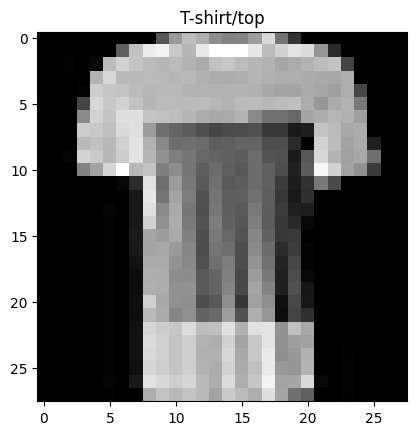

In [32]:
i = 2
print(test_data_samples[i].shape, test_label_samples[i])
plt.imshow(test_data_samples[i].squeeze(), cmap = 'gray')
plt.title(class_names[test_label_samples[i]])

In [33]:
pred_outputs = Make_prediction(model = model_2, data = test_data_samples, device = device)
print(pred_outputs[0])

tensor([6.2909e-02, 5.1304e-03, 8.8496e-01, 1.1411e-03, 8.6867e-04, 5.3644e-05,
        7.2422e-03, 6.2332e-06, 3.7338e-02, 3.5029e-04])


In [34]:
#convert to the right format to compare with the label
pred_labels = pred_outputs.argmax(dim = 1)
print(pred_labels[:10])

tensor([2, 1, 0, 9, 2, 3, 9, 1, 8])


In [35]:
#print the first 10 label
print(test_label_samples[:10])

[2, 1, 0, 9, 6, 3, 9, 1, 8]


### 7.6 Plot the prediction

In [36]:
def Plot_prediction(test_data_samples, test_label_samples, pred_labels):
    plt.figure(figsize = (9,9))
    nrows, ncols = 3,3
    for i, sample in enumerate(test_data_samples):
        # create subplot
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(sample.squeeze(), cmap ='gray')

        #show predcit and label in readable format
        predict_label = class_names[pred_labels[i]]
        truth_label = class_names[test_label_samples[i]]

        #change title color depend on the predict result
        if truth_label == predict_label:
            plt.title(f"Truth: {truth_label} | Predict: {predict_label}", fontsize =10, c= "g")
        else:
            plt.title(f"Truth: {truth_label} | Predict: {predict_label}", fontsize=10, c="r")
        plt.axis(False)

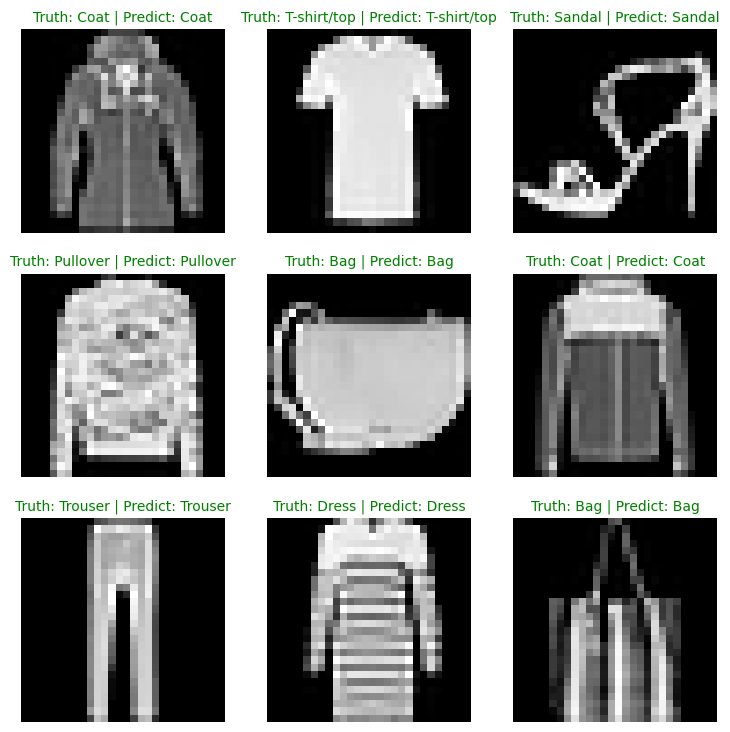

In [37]:
#random.seed(42)
test_data_samples = []
test_label_samples = []
for raw_test_image, raw_test_label in random.sample(list(test_data), k=9):
    test_data_samples.append(raw_test_image)
    test_label_samples.append(raw_test_label)
pred_labels = Make_prediction(model = model_2, data = test_data_samples, device = device).argmax(dim = 1)
Plot_prediction(test_data_samples, test_label_samples, pred_labels)

## 8.Making a confusion matrix for further prediction evaluation
A confusion matrix is a fanstactic way of evaluating your classification model visually

1. Make prediction of the model in the test dataset
2. Make confusion matrix by using `torchmertris.ConfusionMatrix()`
3. Plot the confusion matrix using `mlxtend.plot_confusion_matrix()`

In [38]:
import mlxtend
mlxtend.__version__

'0.21.0'

### 8.1 Make prediciton with model_2

In [39]:
#import libraries
from tqdm.auto import tqdm

#Make prediction on test data
model_2.eval()
y_preds = []
labels = []
with torch.inference_mode():
    for test_image, test_label in tqdm(test_data, desc = "Making decision..."):
        test_image = test_image.to(device)
        test_label = test_label
        #print(test_image.shape, test_label)
        pred_logit = model_2(test_image.unsqueeze(dim =0))
        pred_label = torch.softmax(pred_logit, dim =1 ).argmax(dim = 1)
        y_preds.append(pred_label.cpu())
        labels.append(test_label)

Making decision...: 100%|███████████████| 10000/10000 [00:09<00:00, 1098.08it/s]


In [40]:
y_preds = torch.stack(y_preds)
y_preds = y_preds.squeeze(dim = 1)
y_preds.to('cpu')


tensor([9, 2, 1,  ..., 8, 1, 5])

In [41]:
y_preds[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [42]:
import numpy as np
labels = torch.from_numpy(np.array(labels))


In [43]:
labels[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=torch.int32)

### 8.2 Make confusion matrix

In [44]:
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix

confusion_matrix_fn = ConfusionMatrix(task = 'multiclass', num_classes= len(class_names))
confusion_mtrx_model_2 = confusion_matrix_fn(y_preds, labels)

### 8.3 Plot the confusion matrix

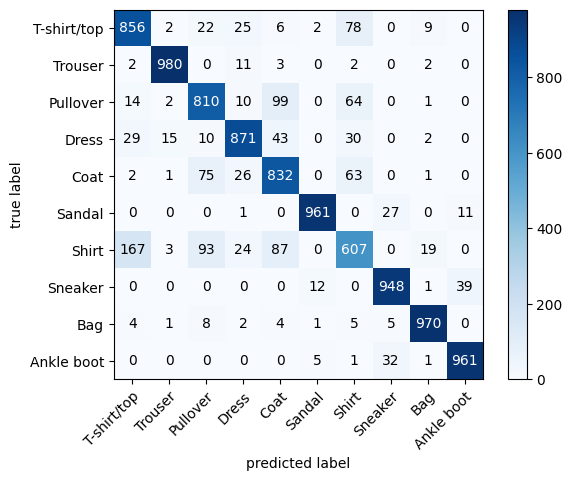

In [47]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_mtrx_model_2.cpu().numpy(), #convert to numpy b/c matplot working with numpy
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False,
                               class_names = class_names)
plt.show()

## 9.Save and Load model_2()

In [53]:
from pathlib import Path

#create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, 
                exist_ok =True)

#create model save
MODEL_NAME = 'MNISTFashion_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

WindowsPath('models/MNISTFashion_model_2.pth')

In [56]:
#save the model state dict
print(f"Saving model state dict to {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(), f= MODEL_SAVE_PATH)

Saving model state dict to models\MNISTFashion_model_2.pth


In [59]:
# load model state dict and make predict
torch.manual_seed(111)
INPUT_SHAPE = 1
OUTPUT_SHAPE = 10
HIDDEN_UNITS = 10

device = 'cuda' if torch.cuda.is_available() else 'cpu'
peinr(device)

#create new model instance
new_model = MNISTModelV2(input_shape =INPUT_SHAPE,
                        output_shape = OUTPUT_SHAPE,
                        hidden_units = HIDDEN_UNITS).to(device)

In [72]:
#load state dict
new_model.load_state_dict(torch.load(f= MODEL_SAVE_PATH))
#make prediction
new_model.eval()
y_preds = []
labels = []
with torch.inference_mode():
    for test_image, test_label in tqdm(test_dataloader, desc = "Making decision..."):
        test_image = test_image.to(device)
        test_label = test_label.to(device)
        #print(test_image.shape, test_label)
        pred_logit = model_2(test_image)
        pred_label = torch.softmax(pred_logit, dim =1 ).argmax(dim = 1)
        y_preds.append(pred_label.cpu())
        labels.append(test_label)


Making decision...: 100%|████████████████████| 313/313 [00:01<00:00, 225.14it/s]


In [73]:
y_preds = torch.cat(y_preds, dim = 0).to(device)
y_preds

tensor([9, 2, 1,  ..., 8, 1, 5])

In [85]:
#labels = torch.cat(labels, dim = 0)
labels

tensor([9, 2, 1,  ..., 8, 1, 5], device='cuda:0')

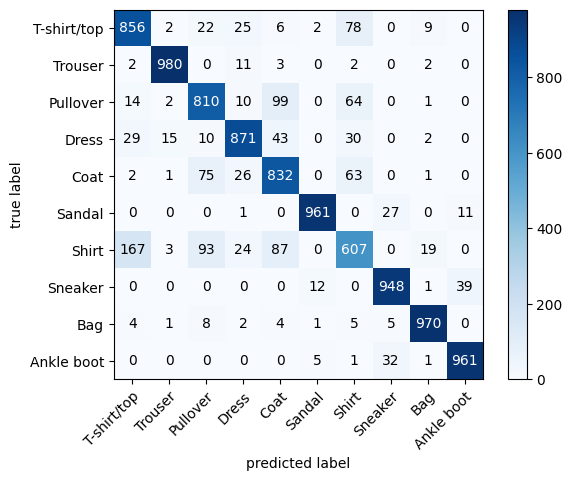

In [95]:
#create confusion matrix nad plot it
#create confusion matrix
confusion_matrix_fn = ConfusionMatrix(task = 'multiclass', num_classes= len(class_names)).to(device)
confusion_mtrx_new_model = confusion_matrix_fn(y_preds, labels)
#plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_mtrx_new_model.cpu().numpy(), #convert to numpy b/c matplot working with numpy
                                colorbar=True,
                                show_absolute=True,
                                show_normed=False,
                               class_names = class_names)
plt.show()